TensorFlow version  2.13.0
Epoch 1/100
63/63 [==============================] - 0s 2ms/step - loss: 0.8214 - accuracy: 0.5285 - binary_crossentropy: 0.8214 - val_loss: 0.7062 - val_accuracy: 0.6010 - val_binary_crossentropy: 0.7062
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5910 - binary_crossentropy: 0.6790 - val_loss: 0.6638 - val_accuracy: 0.6020 - val_binary_crossentropy: 0.6638
Epoch 3/100
63/63 [==============================] - 0s 941us/step - loss: 0.6611 - accuracy: 0.6095 - binary_crossentropy: 0.6611 - val_loss: 0.6584 - val_accuracy: 0.6160 - val_binary_crossentropy: 0.6584
Epoch 4/100
63/63 [==============================] - 0s 882us/step - loss: 0.6587 - accuracy: 0.6215 - binary_crossentropy: 0.6587 - val_loss: 0.6572 - val_accuracy: 0.6190 - val_binary_crossentropy: 0.6572
Epoch 5/100
63/63 [==============================] - 0s 882us/step - loss: 0.6569 - accuracy: 0.6250 - binary_crossentropy: 0.6569 - val_loss: 0.6561

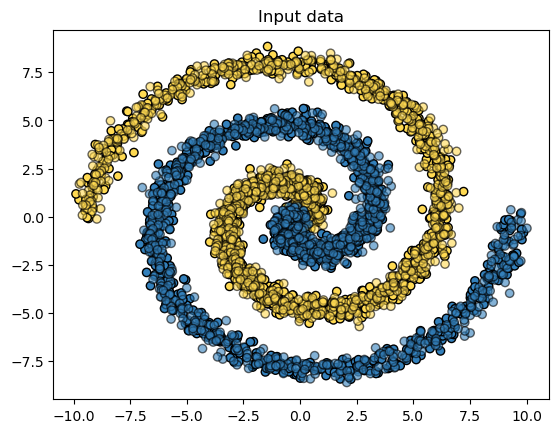

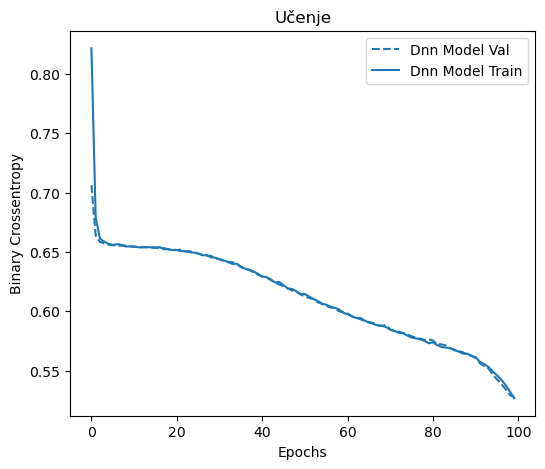

63/63 [==============================] - 0s 362us/step


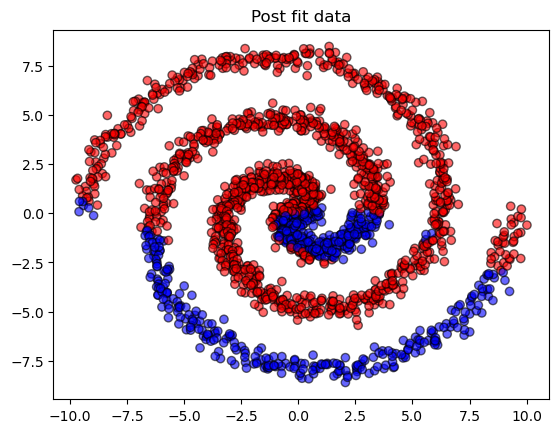

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import tensorflow as tf
print("TensorFlow version ",tf.__version__)
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

#original Jaka Pelaic, modificiral BPK

#risanje ucenja
def plot_history(histories, key='binary_crossentropy'):
#def plot_history(histories, key='acc'):
    plt.figure(figsize=(6,5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    plt.title("Učenje")
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.show()

#narisi spiralo
spiralSize = 1000
spiral = []
spiralIndex = [0 for i in range(spiralSize)] + [1 for i in range(spiralSize)]
# print(spiralIndex)
spiralIndex = np.array(spiralIndex)
spiralinter = np.linspace(0,3*np.pi,spiralSize)
for t in spiralinter:
    spiral.append([t*np.cos(t), t*np.sin(t)])
for t in spiralinter:
    spiral.append([-t*np.cos(t), -t*np.sin(t)])
spiral = np.array(spiral)

# vzorci za ucenje in validacijo z neodvisnim sumom
train_features = spiral + np.random.multivariate_normal(mean=[0,0],cov=[[0.1,0],[0,0.1]],size=2*spiralSize)
valid_features = spiral + np.random.multivariate_normal(mean=[0,0],cov=[[0.1,0],[0,0.1]],size=2*spiralSize)
# print(np.shape(train_features),np.shape(spiral))
train_labels = spiralIndex.copy()
valid_labels = spiralIndex.copy()

#narisi
#cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FFDA52', '#3380BB'])
# Plot the training points
plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=cm_bright,
               edgecolors='k')
# Plot the validation points
plt.scatter(valid_features[:, 0], valid_features[:, 1], c=valid_labels, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
plt.title("Input data")

#definiraj nevronsko mrezo
model = Sequential()  # gradimo nevronsko mrežo po layerjih
model.add(Dense(32, input_shape=(2,))) # prvi layer, 32 nevronov, vhodna dimenzija 2
model.add(Activation('relu')) # aktivacijska funkcija
model.add(Dense(1, activation='sigmoid')) # izhodni layer, 1 nevron, sigmoidna aktivacijska funkcija
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','binary_crossentropy'])

#opcionalno avtomatsko vstavljanje - za dejansko uprorabo zmanjsajte patience na manj epoch in prilagodite min_delta
early_stop = EarlyStopping(monitor='val_loss',min_delta=0.01,patience=5000)

#ucenje: definiraj stevilo ponovitev (epochs) in batches, pazi, n epoch naj gre do recimo 1000, ali pa se vec...
n_epochs=100 # Number of times the entire training dataset is passed through the network.
n_batch=32 # Number of samples processed before the model is updated.
history_data=model.fit(epochs=n_epochs,batch_size=n_batch,
                x=train_features, y=train_labels,
                validation_data=(valid_features,valid_labels),
                callbacks=[early_stop,])

#training history
plot_history([('DNN model', history_data),])

#narisi post fit

#napovedi iz trenirane nn (reformatirane v flat 1D array za risanje)
valid_pred=[x[0] for x in model.predict(x=valid_features)]

#cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the validation points
plt.scatter(valid_features[:, 0], valid_features[:, 1], c=valid_pred, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
plt.title("Post fit data")
plt.show()
